# EDA

### 1. Describe the dataset

The data set we will be visualizing is the HDFS logfile data set. We have 9 columns in this dataset. 

1. Date: Date of the record of the log row entry
2. Time: Time of the record of the log row entry
3. PID: Process ID
4. Level: Information like a log entry is "Warn" or "Info"
5. Component: It contains information like DNS Packet receiver or block etc
6. Content: It contains elaborated details of the component
7. TypeOfContent: It is details about content in a cleaner format
8. datetime_id: It is unique row id
9. Tag: Based on the data, we have added some tags for easier calculation

### 2. Load the dataset

In [1]:
import re
import pandas as pd
import os
os.chdir("/Volumes/UBC/Block6/586-AdvanceMachineLearning/project/machinelearningproject")

# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

parsed_data = pd.read_csv("data/processed_data/HDFS/HDFS_2k_structured.csv")

parsed_data.head()

,Date,Time,PID,Level,Component,Content,TypeOfContent,datetime_id,Tag
0,2008-11-09,203615,148,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_38865049064139...,PacketResponder,81109203615,PacketResponder
1,2008-11-09,203807,222,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_-6952295868487...,PacketResponder,81109203807,PacketResponder
2,2008-11-09,204005,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.addStoredBlock: blockMap upd...,BLOCK*,81109204005,BLOCK*
3,2008-11-09,204015,308,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_82291938032499...,PacketResponder,81109204015,PacketResponder
4,2008-11-09,204106,329,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_-6670958622368...,PacketResponder,81109204106,PacketResponder


In [2]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2000 non-null   object
 1   Time           2000 non-null   int64 
 2   PID            2000 non-null   int64 
 3   Level          2000 non-null   object
 4   Component      2000 non-null   object
 5   Content        2000 non-null   object
 6   TypeOfContent  2000 non-null   object
 7   datetime_id    2000 non-null   int64 
 8   Tag            2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 140.8+ KB


### 3. Explore the data set

In [3]:
parsed_data.describe()

,Time,PID,datetime_id
count,2000.000000,2000.000000,2.000000e+03
mean,107375.609500,7771.287500,8.111047e+10
std,69780.904034,9053.587141,5.743542e+05
min,37.000000,13.000000,8.110920e+10
25%,52286.750000,28.000000,8.111010e+10
50%,92538.000000,2883.500000,8.111022e+10
75%,151136.750000,15851.250000,8.111106e+10
max,235951.000000,26895.000000,8.111110e+10


We have 2000 rows

In [4]:
parsed_data['Date'].unique()

array(['2008-11-09', '2008-11-10', '2008-11-11'], dtype=object)

The data is available for 3 dates only

In [5]:
parsed_data.groupby(['PID']).size()

PID
13        20
18        28
19       242
26        70
27        84
        ... 
26494      1
26526      1
26527      1
26595      1
26895      1
Length: 1054, dtype: int64

We have multiple values of PID and they are not unique for each row. That means some PID will be repeated for some rows. It probably would indicate some kind of process tag involved in the creation of the log entry.

In [6]:
parsed_data.groupby(['Level']).size()

Level
INFO    1920
WARN      80
dtype: int64

There are two types of levels. It includes either "Info" which would indicate "good-to-know" information or "Warn" which would indicate some "warning or improvement". From long term perspective, we feel the "Error" level is missing from the data.

In [7]:
parsed_data.groupby(['Tag']).size()

Tag
BLOCK*             659
Deleting           263
Others_IP_INFO      81
Others_IP_WARN      80
PacketResponder    311
Received           294
Receiving          292
Verification        20
dtype: int64

"Tags" are some indicators which we added based on our understanding of the data. Information like "BLOCK*", "Deleting", "PacketResponder", "Received", "Receiving", "Verification" were deirectly available in the content. 
However there were some rows which had the content starting with an IP address. Those were sub divided into two parts - 1. Whcih contains the word "Got" and 2. which doesn't contain the word "Got". Hence, accordingly those were divided into "Others_IP_INFO" and "Others_IP_WARN"

### 4. Initial thoughts

In [8]:
parsed_data.isnull().sum()

Date             0
Time             0
PID              0
Level            0
Component        0
Content          0
TypeOfContent    0
datetime_id      0
Tag              0
dtype: int64

1 On first look, it looks like fairly clean data \
2 We do not have to do null value treatment as there are no null entries present \
3 However, without visualizations, we cannot comment if we have outliers/anomaly in the data \ 

The purpose of this project is to find anomaly/outlier hence we need are assuming they are present for sure. We cannot be sure at the moment about the proportion of anomaly

### 5. Data Visualization

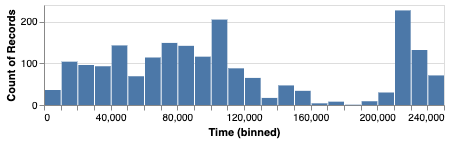

In [9]:
# Graph 1

alt.Chart(parsed_data).mark_bar().encode(
    x=alt.X('Time', bin=alt.Bin(maxbins=24)),
    y='count()'
    ).properties(
    height=100
)

In the above graph we can see the hourly distribution of the log entries 

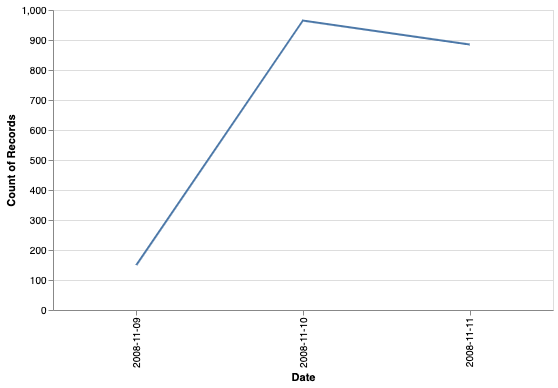

In [10]:
# Graph 2

alt.Chart(parsed_data).mark_line().encode(
alt.X('Date'),
    y = 'count()',
).properties(
    height=300, width = 500
)

The above graph gives an idea about how many log entries were created per day

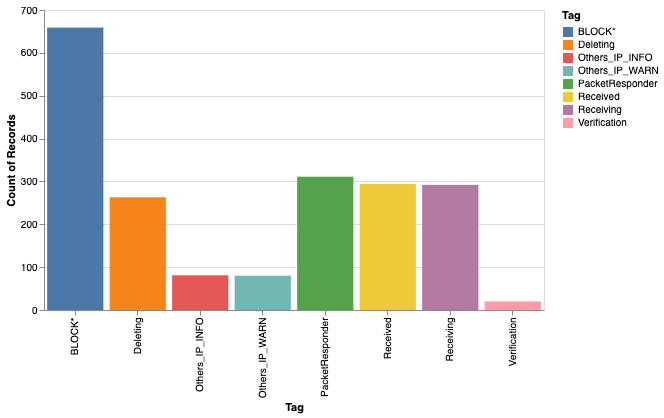

In [11]:
# Graph 3
alt.Chart(parsed_data).mark_bar().encode(
    x=alt.X('Tag'),
    y='count()',
    color = "Tag").properties(
    height=300, width = 500
)

Based on the tags which we created, we tried dividing the data in few section to understand how many entries are there per tag. We see, we have a lot of entries related to block and very few entries related to verification.

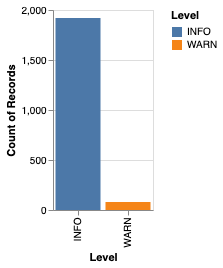

In [12]:
# Graph 4

alt.Chart(parsed_data).mark_bar().encode(
    x=alt.X('Level'),
    y = 'count()',
    color = "Level").properties(
    height=200, width = 100
)


The levels are split into "INFO" and "WARN" and we can observe we have very few warnings

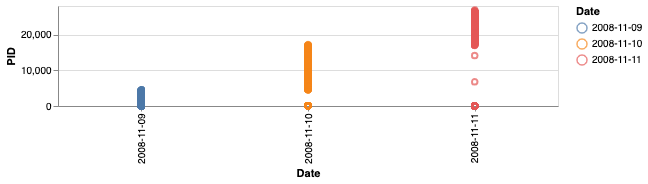

In [13]:
# Graph 5

alt.Chart(parsed_data).mark_point().encode(
    x= alt.X('Date'),
    y = alt.Y('PID'),
    color = "Date").properties(
    height=100, width = 500
)

Here, we wanted to understand how PID is related to the dates

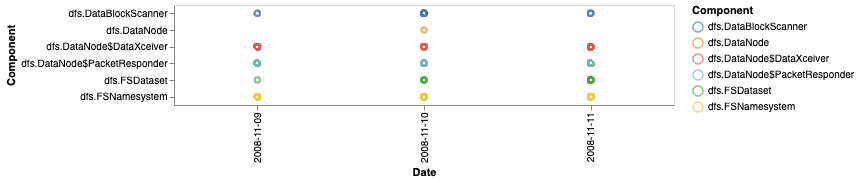

In [14]:
# Graph 6

alt.Chart(parsed_data).mark_point().encode(
    x= alt.X('Date'),
    y = alt.Y('Component'),
    color = "Component").properties(
    height=100, width = 500
)

In the above graph we wanted to know how each compenent is related to the date